In [31]:
import pandas as pd
from pandas.io import gbq
import os
from google.oauth2 import service_account
from google.cloud import bigquery
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credentials=service_account.Credentials.from_service_account_file("gcloudizle.json")
project_id=credentials.project_id
client=bigquery.Client(credentials=credentials,project=credentials.project_id)

In [3]:
query="SELECT event_date,user_pseudo_id,platform,category,source_path,search_result_success,search_success FROM `trt-tv-4aeb6.analytics_221574377.searchDaily` WHERE event_date between '2021-12-01' and '2021-12-16' "

In [364]:
df=gbq.read_gbq(query,credentials=credentials,project_id=project_id)

In [365]:
df.head()

,event_date,user_pseudo_id,platform,category,source_path,search_result_success,search_success
0,2021-12-01,75754368.1633955602,WEB,desktop,b,1.0,0.0
1,2021-12-01,75754368.1633955602,WEB,desktop,bir aş,1.0,1.0
2,2021-12-01,75754368.1633955602,WEB,desktop,bir aş hikayesi,1.0,0.0
3,2021-12-01,75754368.1633955602,WEB,desktop,bir aş,1.0,0.0
4,2021-12-01,75754368.1633955602,WEB,desktop,bir aş hika,1.0,0.0


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693407 entries, 0 to 693406
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   event_date             693407 non-null  datetime64[ns]
 1   user_pseudo_id         693407 non-null  object        
 2   platform               693407 non-null  object        
 3   category               693407 non-null  object        
 4   source_path            688328 non-null  object        
 5   search_result_success  683121 non-null  float64       
 6   search_success         588895 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 37.0+ MB


In [367]:
df.describe()

,search_result_success,search_success
count,683121.000000,588895.000000
mean,0.832918,0.155491
std,0.373049,0.362373
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [368]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
693402     True
693403     True
693404     True
693405     True
693406     True
Length: 693407, dtype: bool

In [369]:
len(df)

693407

In [370]:
df.isnull().sum()

event_date                    0
user_pseudo_id                0
platform                      0
category                      0
source_path                5079
search_result_success     10286
search_success           104512
dtype: int64

In [371]:
df["search_result_success"].mean()

0.8329183263287178

In [372]:
df["search_success"].mean()

0.15549121660058246

In [373]:
df["search_result_success"]=df["search_result_success"].fillna(0)

In [374]:
df["search_success"]=df["search_success"].fillna(0)

In [375]:
df.isnull().sum()

event_date                  0
user_pseudo_id              0
platform                    0
category                    0
source_path              5079
search_result_success       0
search_success              0
dtype: int64

In [376]:
len(df)

693407

In [378]:
df["source_path"].value_counts()

beni                        6269
gön                         5994
toz                         4848
gö                          4205
alp                         4181
                            ... 
4•sınıf ingilzce FREE Ta       1
alparslan bük selçuklu         1
Doğunun kayıp slü              1
trt2 filmler                   1
barvaros akdenizin             1
Name: source_path, Length: 120422, dtype: int64

In [379]:
df=df.reset_index()

In [380]:
df.head()

,index,event_date,user_pseudo_id,platform,category,source_path,search_result_success,search_success
0,0,2021-12-01,75754368.1633955602,WEB,desktop,b,1.0,0.0
1,1,2021-12-01,75754368.1633955602,WEB,desktop,bir aş,1.0,1.0
2,2,2021-12-01,75754368.1633955602,WEB,desktop,bir aş hikayesi,1.0,0.0
3,3,2021-12-01,75754368.1633955602,WEB,desktop,bir aş,1.0,0.0
4,4,2021-12-01,75754368.1633955602,WEB,desktop,bir aş hika,1.0,0.0


In [386]:
max_search=df["source_path"].value_counts()[:10]

In [387]:
top_ten=pd.DataFrame(max_search)

In [388]:
top_ten=top_ten.reset_index()
top_ten.rename(columns={'index': 'Aranan Kelime',"source_path":"Arama Sayısı"}, inplace=True)

In [389]:
top_ten

,Aranan Kelime,Arama Sayısı
0,beni,6269
1,gön,5994
2,toz,4848
3,gö,4205
4,alp,4181
5,to,4152
6,gönül dağı,4100
7,leyla,3309
8,gönül,3216
9,ley,3052


Text(0.5, 1.0, 'En Çok Aranan 10 Kelime')

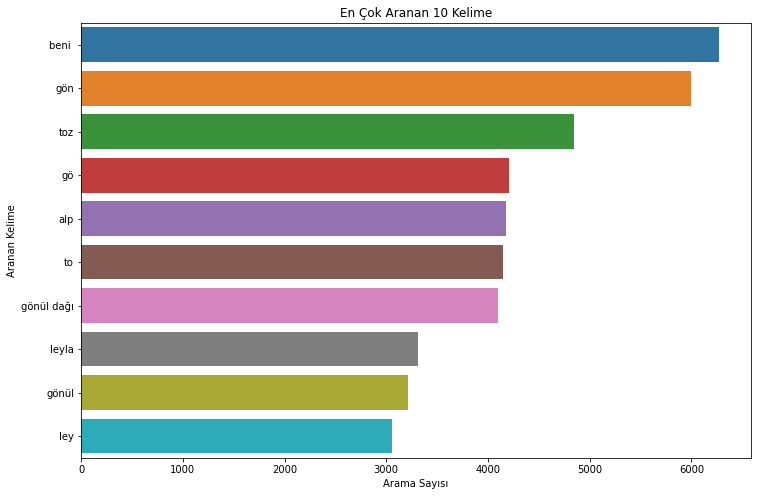

In [459]:
#En çok Aranan 10 kelime
plt.figure(figsize=(12,8))
sns.barplot(data=top_ten,x="Arama Sayısı",y="Aranan Kelime")
plt.title("En Çok Aranan 10 Kelime")

In [391]:
#Platforma göre aramaların başarı ortalaması
mean_plat=df.groupby("platform").mean()

In [392]:
mean_plat

,index,search_result_success,search_success
platform,,,
ANDROID,329580.727350,0.526310,0.229866
IOS,334576.626337,0.632173,0.323932
WEB,357266.055643,1.000000,0.058886


<AxesSubplot:ylabel='search_result_success'>

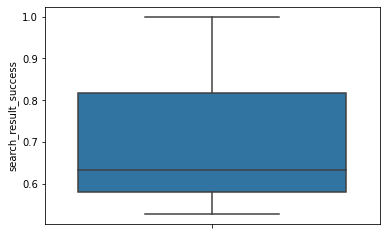

In [393]:
sns.boxplot(data=mean_plat,y='search_result_success')

Text(0.5, 1.0, 'Platform ve Arama Isı Haritası')

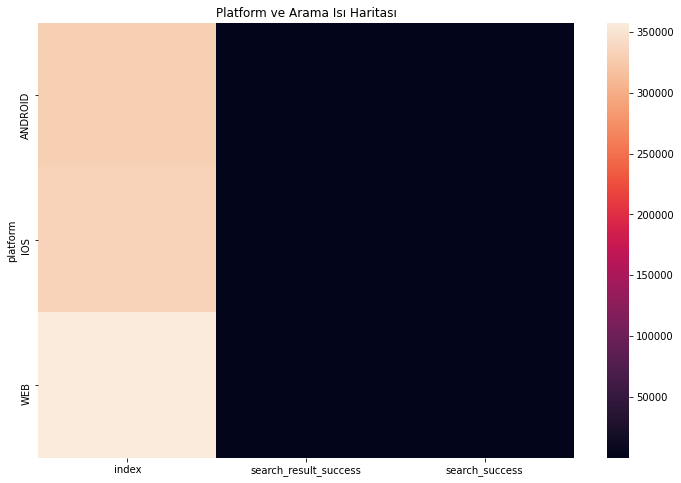

In [394]:
plt.figure(figsize=(12,8))
sns.heatmap(mean_plat)
plt.title("Platform ve Arama Isı Haritası")

In [395]:
#En çok hangi kategoride(cihaz) arama yapıldı?
df["category"].value_counts()

mobile      387925
desktop     251707
tablet       34912
smart tv     18863
Name: category, dtype: int64

Text(0, 0.5, 'Arama Sayısı')

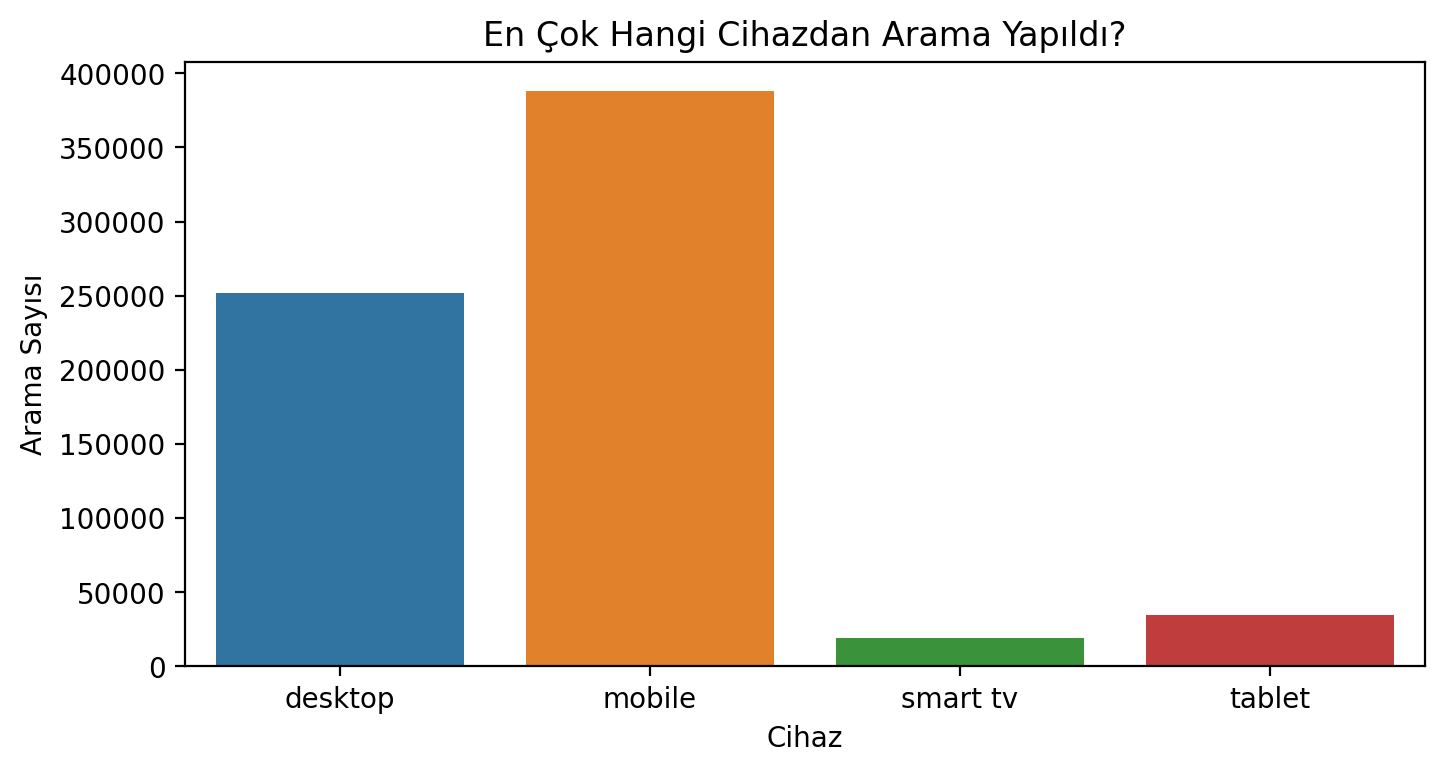

In [396]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(data=df,x="category")
plt.title("En Çok Hangi Cihazdan Arama Yapıldı?")
plt.xlabel("Cihaz")
plt.ylabel("Arama Sayısı")

Text(0, 0.5, 'Arama Sayısı')

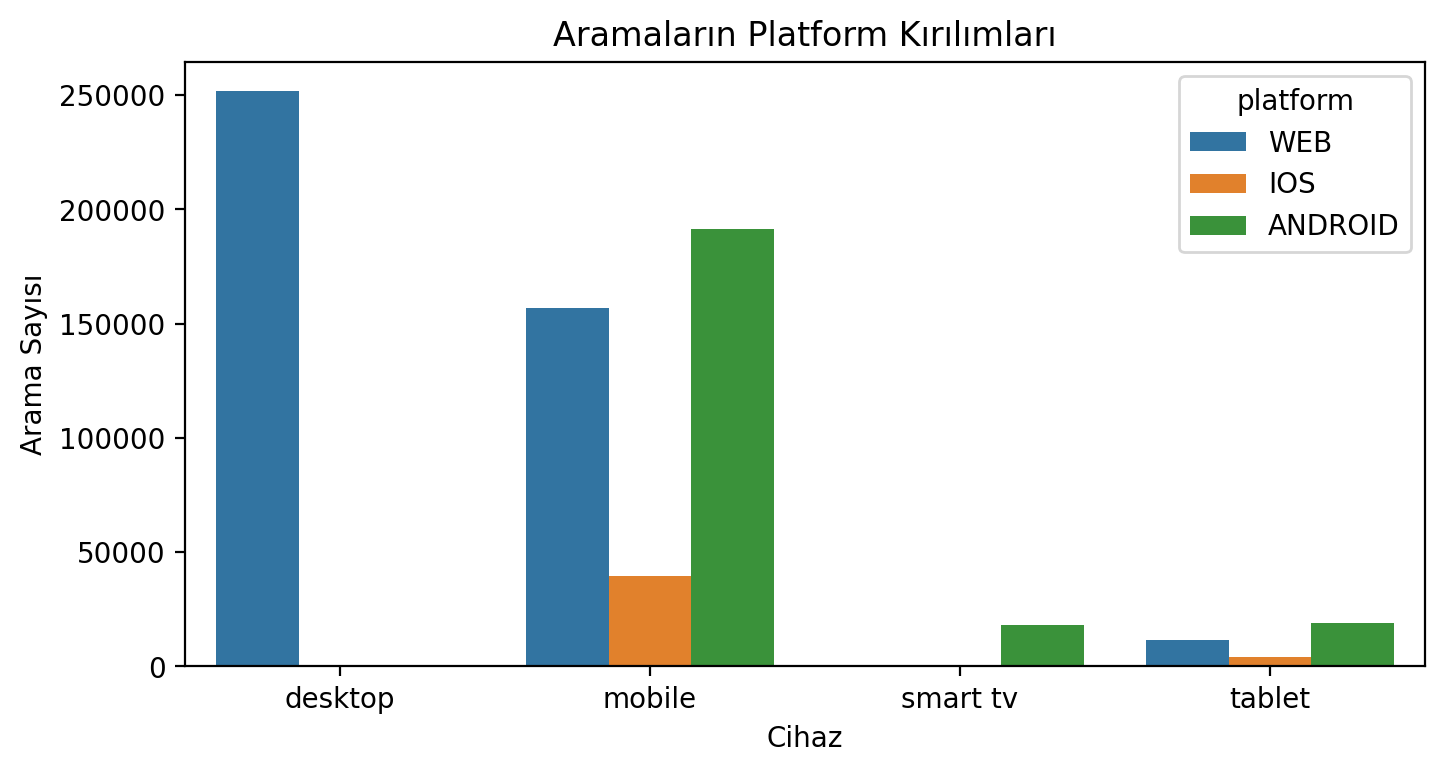

In [397]:
#platform üzerinden
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(data=df,x="category",hue="platform")
plt.title("Aramaların Platform Kırılımları")
plt.xlabel("Cihaz")
plt.ylabel("Arama Sayısı")

Text(0.5, 0, 'Başarılı Arama Sonuç Sayısı')

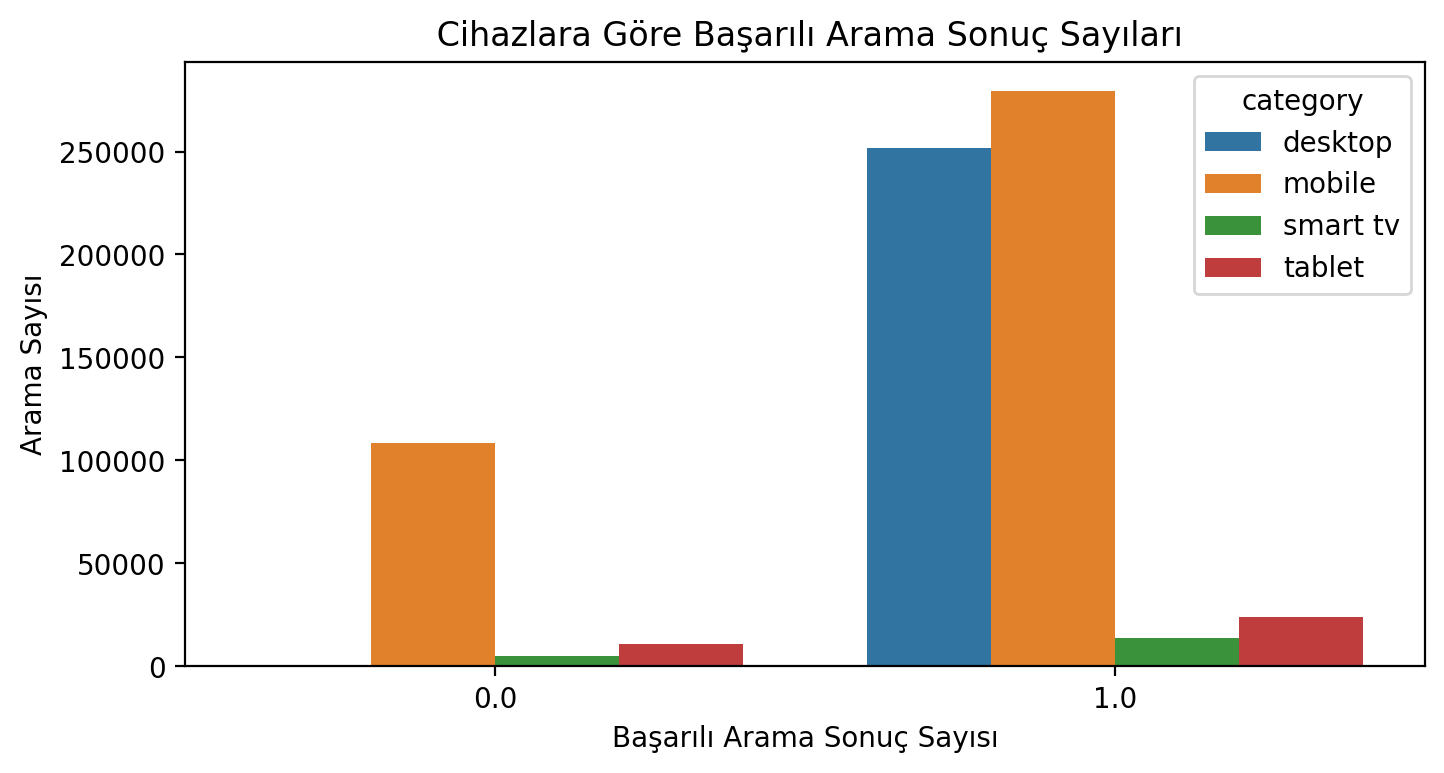

In [398]:
#Aramaların kaçı başarılı oldu-platforma göre?
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(data=df,x="search_result_success",hue="category")
plt.title(" Cihazlara Göre Başarılı Arama Sonuç Sayıları")
plt.ylabel("Arama Sayısı")
plt.xlabel("Başarılı Arama Sonuç Sayısı")

In [444]:
#Aramaların yüzde 21'i başarısız olmuş 
df[df["search_result_success"]==0].count()/df[df["search_result_success"]==1].count()

index                    0.218676
event_date               0.218676
user_pseudo_id           0.218676
platform                 0.218676
category                 0.218676
source_path              0.217136
search_result_success    0.218676
search_success           0.218676
dtype: float64

In [445]:
#Aramaların yüzde 21'i başarısız olmuş 
df[df["search_success"]==0].count()/df[df["search_success"]==1].count()

index                    6.572591
event_date               6.572591
user_pseudo_id           6.572591
platform                 6.572591
category                 6.572591
source_path              6.527235
search_result_success    6.572591
search_success           6.572591
dtype: float64

Text(0.5, 0, 'Başarılı Arama Sayısı')

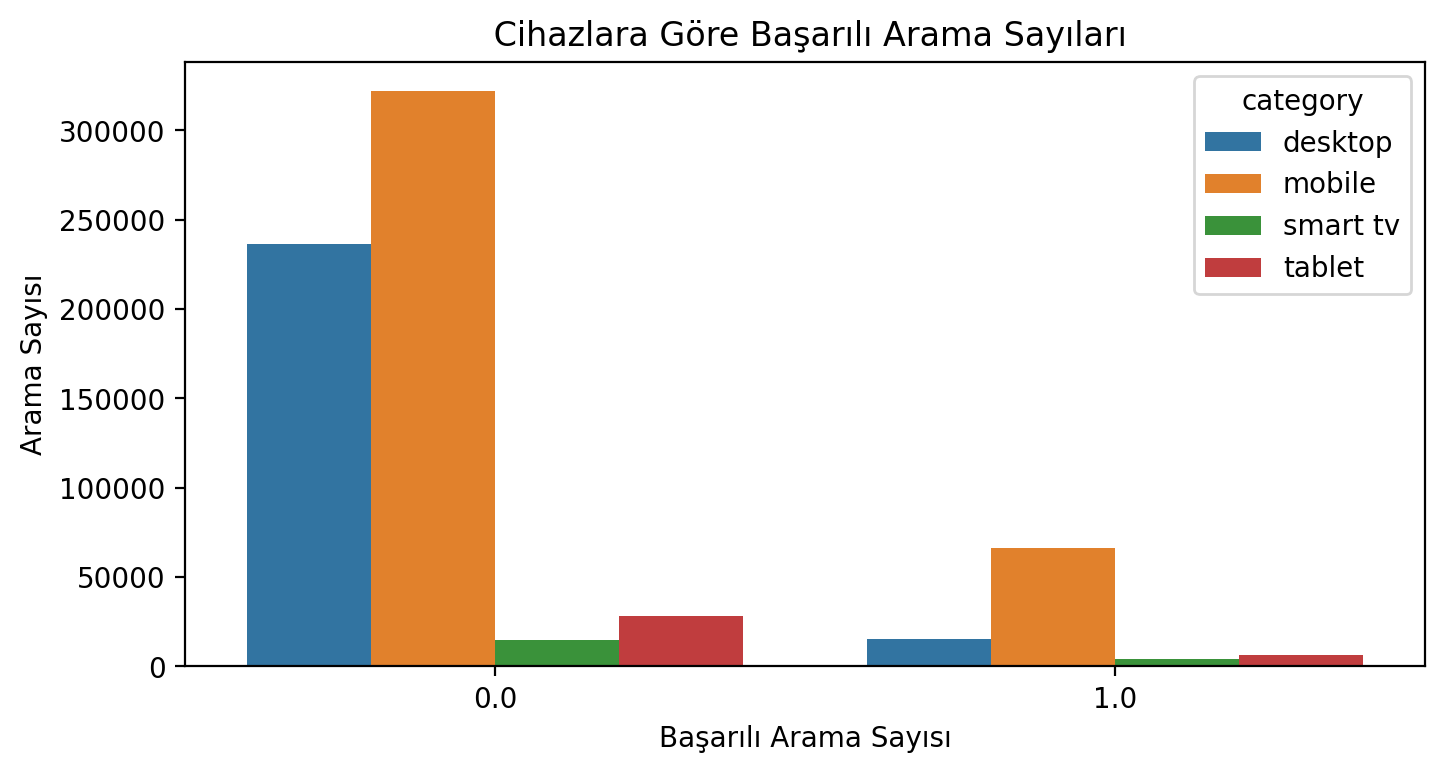

In [399]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(data=df,x="search_success",hue="category")
plt.title(" Cihazlara Göre Başarılı Arama Sayıları")
plt.ylabel("Arama Sayısı")
plt.xlabel("Başarılı Arama Sayısı")

Text(0.5, 1.0, 'Aramaların Başarılı Sonuç Oranı')

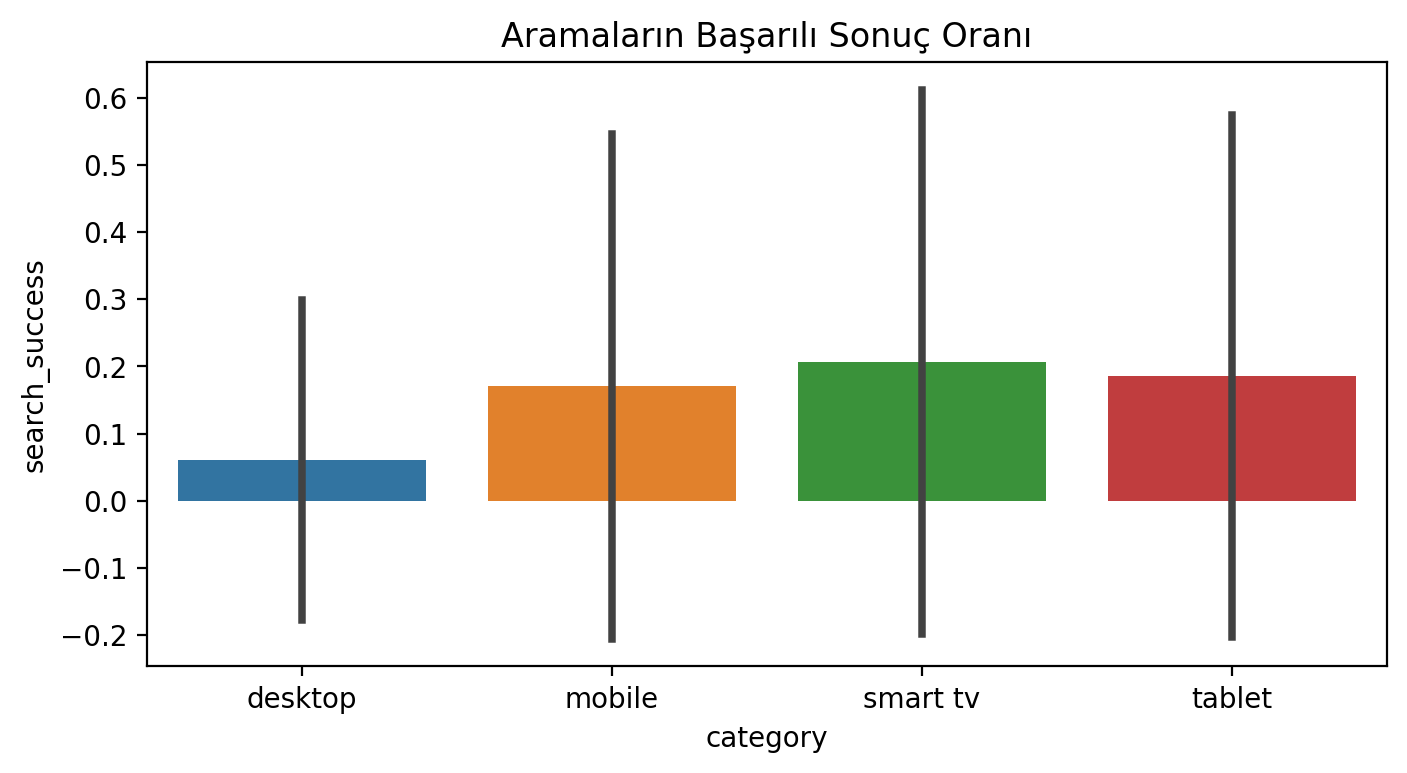

In [400]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(data=df,x="category",y="search_success",
            estimator=np.mean,ci='sd')
plt.title("Aramaların Başarılı Sonuç Oranı")

In [401]:
df.groupby(["category","platform"]).mean()

index  search_result_success  search_success
category platform                                                      
desktop  WEB       352978.111082               1.000000        0.060296
mobile   ANDROID   332263.739751               0.508828        0.230589
         IOS       335701.697221               0.631909        0.324952
         WEB       366246.545398               1.000000        0.057165
smart tv ANDROID   316308.583163               0.723844        0.213736
         WEB       382868.001238               1.000000        0.047030
tablet   ANDROID   315145.418418               0.514725        0.237922
         IOS       324193.045296               0.634611        0.314518
         WEB       327235.491141               1.000000        0.052383

In [402]:
date=df["event_date"].value_counts()

In [403]:
date

2021-12-12    73147
2021-12-14    67505
2021-12-05    67065
2021-12-13    59637
2021-12-11    52469
2021-12-06    51053
2021-12-07    49199
2021-12-04    47877
2021-12-16    46659
2021-12-10    39897
2021-12-09    35561
2021-12-03    35532
2021-12-01    34867
2021-12-02    32939
Name: event_date, dtype: int64

In [404]:
dates=pd.DataFrame(date)

In [405]:
dates=dates.reset_index()

In [406]:
dates.rename(columns={'index': 'Date','event_date':'Count'}, inplace=True)

In [407]:
dates.sort_values("Date")

,Date,Count
12,2021-12-01,34867
13,2021-12-02,32939
11,2021-12-03,35532
7,2021-12-04,47877
2,2021-12-05,67065
5,2021-12-06,51053
6,2021-12-07,49199
10,2021-12-09,35561
9,2021-12-10,39897
4,2021-12-11,52469


In [434]:
dates=df.groupby("event_date").count()

In [435]:
dates

,index,user_pseudo_id,platform,category,source_path,search_result_success,search_success
event_date,,,,,,,
2021-12-01,34867,34867,34867,34867,34726,34867,34867
2021-12-02,32939,32939,32939,32939,32739,32939,32939
2021-12-03,35532,35532,35532,35532,35340,35532,35532
2021-12-04,47877,47877,47877,47877,47464,47877,47877
2021-12-05,67065,67065,67065,67065,66712,67065,67065
2021-12-06,51053,51053,51053,51053,50670,51053,51053
2021-12-07,49199,49199,49199,49199,48902,49199,49199
2021-12-09,35561,35561,35561,35561,35320,35561,35561
2021-12-10,39897,39897,39897,39897,39635,39897,39897


Text(0.5, 1.0, 'Aramaların Zamana Göre Değişimi')

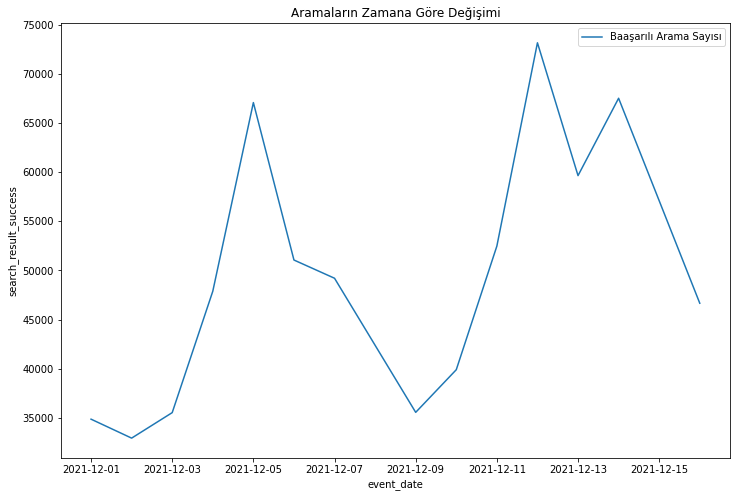

In [458]:
plt.figure(figsize=(12,8))
sns.lineplot(data=dates["search_result_success"],label="Baaşarılı Arama Sayısı")
plt.title("Aramaların Zamana Göre Değişimi")